In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/'Colab Notebooks'/telugu_nlp

In [ ]:
!pip install indic-nlp-library
!pip install inltk

In [47]:
 import matplotlib.pyplot as plt
 from sklearn.cluster import KMeans
 from sklearn.metrics import silhouette_score
 from sklearn.preprocessing import StandardScaler
 from sklearn.utils import shuffle


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [48]:
stothram_file = open('aigiri.txt', 'r')
stothram_txt = stothram_file.read()
stothram_file.close()

chalisa_file = open('hanuman_chalisa.txt', 'r')
chalisa_txt = chalisa_file.read()
chalisa_file.close()

In [49]:
pattern_list = []

def get_sloka_from_stothram(stothram_txt):
  slokams = []
  for sloka in stothram_txt.split('||'):
    if not sloka.replace(' ', '').isnumeric() and not sloka == '\n' and not sloka == '':
      slokams.append( sloka.replace('|', '').replace('\n', '') )
  return slokams

def gen_patterns(slokams):
  global pattern_list
  for sloka in slokams:
    temp = {}
    for words in sloka.split():
      for char in words:
        if char in temp.keys():
          temp[char] = temp[char] + 1
        else:
          temp[char] = 1 
    pattern_list.append(temp)

In [50]:
aigiri = get_sloka_from_stothram(stothram_txt)
chalisa = get_sloka_from_stothram(chalisa_txt)

In [51]:
gen_patterns(aigiri)
gen_patterns(chalisa)

In [52]:
df = pd.DataFrame(pattern_list).fillna(0)
df

,అ,య,ి,గ,ర,న,ం,ద,త,మ,ే,వ,శ,్,-,ో,ు,ధ,‌,உ,ా,స,ష,ణ,ల,జ,భ,హ,క,ఠ,ట,బ,ూ,ృ,ప,ై,ఖ,ఘ,ఙ,డ,చ,ౌ,ీ,థ,ఫ,ఝ,ః,ళ,ె,ఞ,ఉ,ఔ,ఆ
0,1.0,5.0,39.0,3.0,10,14.0,7.0,7.0,7.0,4.0,7.0,9.0,4.0,7.0,6.0,2.0,10.0,2.0,1.0,1.0,3,4.0,3.0,4.0,2.0,3.0,3.0,3.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,28.0,0.0,20,5.0,2.0,8.0,8.0,8.0,5.0,2.0,3.0,12.0,10.0,7.0,12.0,3.0,0.0,0.0,1,6.0,13.0,9.0,2.0,3.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.0,19.0,4.0,11,7.0,6.0,5.0,7.0,10.0,6.0,2.0,4.0,5.0,9.0,1.0,6.0,4.0,0.0,0.0,6,5.0,1.0,1.0,3.0,6.0,3.0,4.0,4.0,0.0,0.0,3.0,0.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,20.0,4.0,9,5.0,11.0,4.0,10.0,6.0,5.0,3.0,4.0,4.0,18.0,0.0,8.0,3.0,0.0,0.0,8,2.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,1.0,8.0,1.0,2.0,0.0,0.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,6.0,13.0,0.0,19,4.0,1.0,13.0,15.0,8.0,5.0,3.0,5.0,10.0,19.0,1.0,11.0,4.0,0.0,0.0,7,2.0,1.0,2.0,1.0,3.0,1.0,4.0,4.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,4.0,19.0,0.0,10,6.0,3.0,3.0,13.0,9.0,5.0,6.0,10.0,8.0,15.0,4.0,6.0,2.0,0.0,0.0,5,4.0,2.0,2.0,3.0,5.0,4.0,5.0,3.0,0.0,0.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,3.0,10.0,9.0,13,7.0,9.0,6.0,7.0,3.0,5.0,1.0,3.0,11.0,18.0,0.0,9.0,1.0,0.0,0.0,2,6.0,5.0,2.0,2.0,2.0,1.0,4.0,11.0,0.0,7.0,3.0,0.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,6.0,18.0,1.0,17,5.0,1.0,9.0,7.0,10.0,5.0,7.0,5.0,6.0,16.0,3.0,8.0,3.0,1.0,1.0,7,3.0,1.0,1.0,4.0,2.0,3.0,3.0,7.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,8.0,20.0,1.0,13,9.0,1.0,5.0,11.0,9.0,9.0,2.0,1.0,10.0,15.0,2.0,4.0,5.0,0.0,0.0,8,6.0,1.0,1.0,5.0,3.0,2.0,4.0,6.0,0.0,3.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,10.0,16.0,0.0,9,12.0,3.0,3.0,14.0,5.0,6.0,2.0,4.0,10.0,19.0,1.0,5.0,1.0,0.0,0.0,6,3.0,1.0,2.0,1.0,8.0,1.0,3.0,4.0,0.0,7.0,1.0,2.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
x = df.values
y = np.concatenate((np.ones(21), np.zeros(21)))
x

array([[ 1.,  5., 39., ...,  0.,  0.,  0.],
       [ 0.,  3., 28., ...,  0.,  0.,  0.],
       [ 1.,  8., 19., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  1.,  4., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  2.]])

In [54]:
x, y = shuffle(x, y)

In [55]:
preprocessor = Pipeline(
    [
      ("scaler", MinMaxScaler()),
      ("pca", PCA(n_components=2, random_state=42)),
    ]
   )

In [56]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters = 2,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [57]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [58]:
pipe.fit(x)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=2, n_init=50, n_jobs=None,
                                         precomp

The Silhouette_score tells how well the clusters are separeted or how well they are not overlapping.

In [59]:
preprocessed_data = pipe["preprocessor"].transform(x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.7223524749093778

Adjuncted_rand_score tells the accuracy:

In [60]:
adjusted_rand_score(y, predicted_labels)

1.0

In [45]:
zero_labels = []
one_labels = []

for i, label in enumerate(pipe["clusterer"]["kmeans"].labels_):
  if label == 0:
    zero_labels.append(preprocessed_data[i]) 
  else:
    one_labels.append(preprocessed_data[i]) 

zero_labels = np.array(zero_labels)
one_labels = np.array(one_labels) 


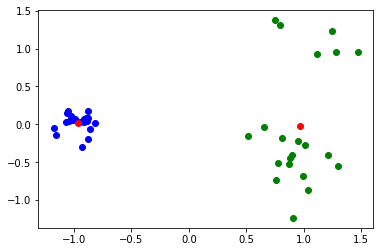

In [46]:
plt.plot( zero_labels[:, 0], zero_labels[:, 1], 'og', one_labels[:, 0] , one_labels[:, 1], "ob", pipe["clusterer"]["kmeans"].cluster_centers_[:, 0], pipe["clusterer"]["kmeans"].cluster_centers_[:, 1], 'or' )
plt.show() 

In [ ]:
pipe["clusterer"]["kmeans"].cluster_centers_

array([[-0.96524892,  0.02311122],
       [ 0.96524892, -0.02311122]])